# LMO: Bak data

In [1]:
import galpynostatic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Cargamos los datos para el LMO y las $C_{rates}$ utilizadas

In [2]:
C_rates = [1, 5, 10, 20, 50, 100]

In [3]:
dataframes = [pd.read_csv(f"data/bak/{crate}C.csv", header=None) for crate in C_rates]

Ploteamos las curvas para verlas, con el potencial de equilibrio y el de corte correspondientes.

In [4]:
eq_pot = 4.0  # este valor es mencionado en el trabajo
vcut = 0.15

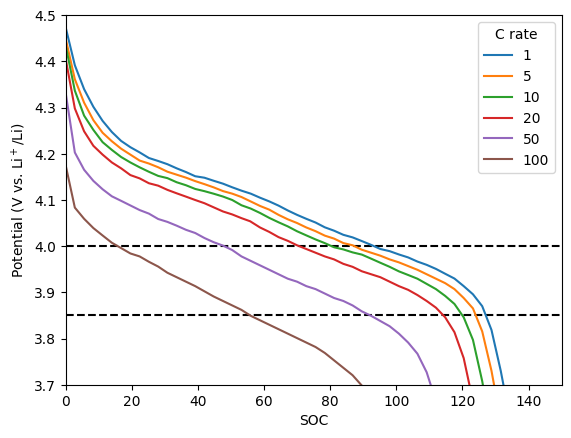

In [5]:
fig, ax = plt.subplots()

ax.axhline(y=eq_pot, color="k", linestyle="--")
ax.axhline(y=eq_pot - vcut, color="k", linestyle="--")
for crate, df in zip(C_rates, dataframes):
    ax.plot(df[0], df[1], label=f"{crate}")
    
ax.set_xlim((0, 150))
ax.set_ylim((3.7, 4.5))
ax.set_xlabel(r"SOC")
ax.set_ylabel(r"Potential (V vs. Li$^+$/Li)")
ax.legend(title="C rate")
plt.show()

Podemos usar la herramienta desarrollada para obtener las capacidades de descarga

In [6]:
C_rates = np.asarray(C_rates).reshape(-1, 1)
xmaxs = galpynostatic.preprocessing.get_discharge_capacities(dataframes, eq_pot)
xmaxs

array([127.32904 , 124.29212 , 120.07357 , 114.329475,  92.15335 ,
        55.795765], dtype=float32)

Podemos normalizar estas corrientes por algún valor que deseemos, en este caso 100 para tener entre 0 y 1

In [7]:
xmaxs = xmaxs / 132.4
xmaxs

array([0.9616997 , 0.9387623 , 0.9069001 , 0.86351573, 0.69602233,
       0.4214182 ], dtype=float32)

Y visualizar los datos que vamos a usar para ajustar

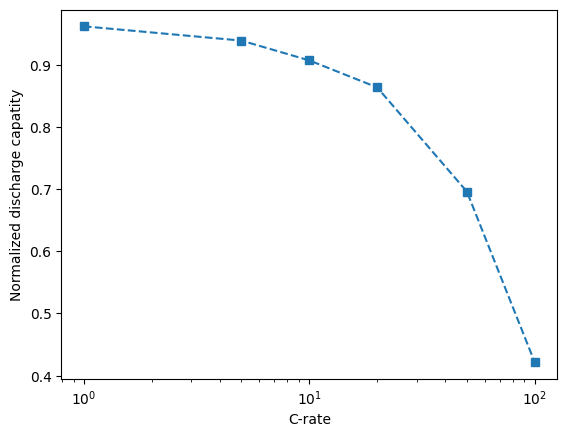

In [8]:
plt.plot(C_rates, xmaxs, marker="s", ls="--")

plt.xlabel("C-rate")
plt.ylabel("Normalized discharge capatity")
plt.xscale("log")
plt.show()

En el trabajo se menciona que los tamaños de particulas están distribuidos entre $10-40 nm$, tomo el punto medio 

In [9]:
d = 2.5e-6

Cargamos los datos de la superficie para la geometría esférica

In [10]:
dataset = galpynostatic.datasets.load_spherical()

Y fiteamos sobre la misma

In [11]:
greg = galpynostatic.model.GalvanostaticRegressor(dataset, d, 3)

greg.fit(C_rates, xmaxs)

Y el valor extrapolado para el coeficiente de difusión es de

In [12]:
greg.dcoeff_

3.5111917342151274e-14

Mientras que el coeficiente de difusión reportado en este trabajo, para este ratio Li/Ti, es de $5.12\times10^{-12}$

mientras que el de k0 es

In [13]:
greg.k0_

1.873817422860383e-08

con un error cuadrático medio para el modelo de

In [14]:
greg.mse_

0.00043402570611160294

Podemos estimar el valor óptimo para la longuitud caracteristica de la nanoparticula, es decir el tamaño para obtener un 80% en 5 minutos

In [15]:
greg.t_minutes_lenght()

0.02471382736642347

Ploteamos los datos versus las predicciones

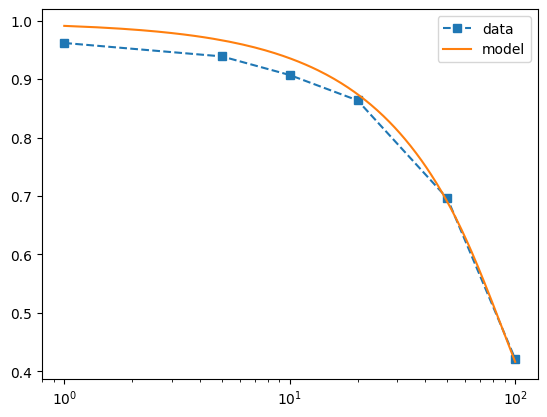

In [16]:
greg.plot_vs_data(C_rates, xmaxs)
plt.xscale("log")
plt.legend()
plt.show()

Por último, podemos observar la región del mapa en la que se encuentran estos resultados

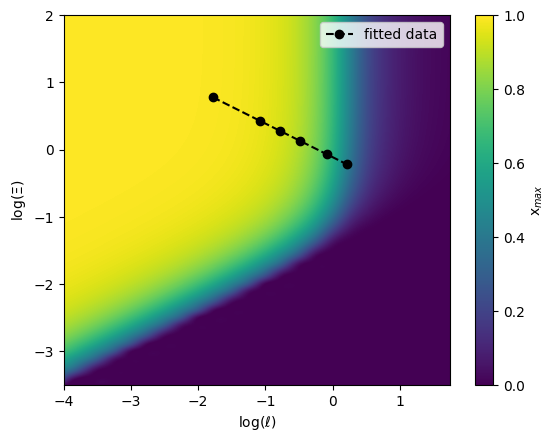

In [17]:
greg.plot_in_surface(C_rates)
plt.legend()
plt.show()